In [27]:
import os
from pathlib import Path

from es_sfgtools.data_mgmt.data_handler import DataHandler
pride_path = Path.home() / ".PRIDE_PPPAR_BIN"
os.environ["PATH"] += os.pathsep + str(pride_path)
import matplotlib.pyplot as plt
%matplotlib ipympl


In [28]:
main_dir = Path("/Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain")
dh = DataHandler(main_dir)

network = "cascadia-gorda"
station = "NCC1"
survey = "2024_A_1126"

dh.change_working_station(network=network, station=station, campaign=survey)



In [29]:
print(dates:=dh.kin_position_tdb.get_unique_dates())

['2022-05-01' '2022-05-03' '2022-05-04' '2022-05-05' '2022-05-06'
 '2022-05-07' '2022-05-08' '2022-05-09' '2023-09-08' '2023-09-09'
 '2023-09-10' '2023-09-11' '2023-09-12' '2023-09-13' '2023-09-14']


In [30]:
dates[0]

numpy.datetime64('2022-05-01')

In [54]:
kin_positions = dh.kin_position_tdb.read_df(dates[4], dates[5])
shotdata = dh.shotdata_tdb_pre.read_df(dates[4], dates[5])


In [47]:
kin_positions.head()

,time,latitude,longitude,height,east,north,up,number_of_satellites,pdop,wrms
0,2022-05-06 00:00:00.000,41.659099,235.062105,-28.1257,-2.733000e+06,-3.912147e+06,4.217372e+06,11,1.4,5.380650
1,2022-05-06 00:00:00.999,41.659097,235.062103,-27.1692,-2.733000e+06,-3.912147e+06,4.217372e+06,11,1.4,4.074118
2,2022-05-06 00:00:01.999,41.659097,235.062104,-27.6261,-2.733000e+06,-3.912147e+06,4.217372e+06,11,1.4,3.511849
3,2022-05-06 00:00:02.999,41.659093,235.062116,-28.1595,-2.732999e+06,-3.912147e+06,4.217371e+06,11,1.4,3.025103
4,2022-05-06 00:00:04.000,41.659087,235.062120,-28.9036,-2.732999e+06,-3.912148e+06,4.217370e+06,11,1.4,2.820126


In [48]:
shotdata.head()

,pingTime,transponderID,head0,pitch0,roll0,head1,pitch1,roll1,east0,north0,...,east_std1,north_std1,up_std1,returnTime,tt,dbv,xc,snr,tat,isUpdated
0,1.651795e+09,IR5209,131.765137,-1.059283,1.794902,132.588379,3.650667,0.141165,-2.733001e+06,-3.912147e+06,...,7.788,8.154,23.0,1.651795e+09,1.636898,-30,68,15.0,0.2,0
1,1.651795e+09,IR5209,150.774673,-0.521324,-3.328873,143.650452,3.974211,1.485776,-2.733006e+06,-3.912151e+06,...,7.804,8.155,23.0,1.651795e+09,1.634609,-10,76,36.0,0.2,0
2,1.651795e+09,IR5209,130.266647,3.410717,-2.966369,132.388718,4.405166,0.993787,-2.733012e+06,-3.912156e+06,...,7.845,8.155,23.0,1.651795e+09,1.631912,-10,88,37.0,0.2,0
3,1.651795e+09,IR5209,141.069656,-13.314089,8.962605,137.545593,3.645947,2.781657,-2.733016e+06,-3.912161e+06,...,7.843,8.131,23.0,1.651795e+09,1.627579,-10,80,38.0,0.2,0
4,1.651795e+09,IR5209,137.902283,-3.733109,-6.117216,138.326904,5.988830,-2.783530,-2.733020e+06,-3.912166e+06,...,7.828,8.125,23.0,1.651795e+09,1.624502,-13,78,34.0,0.2,0


In [45]:
shotdata = shotdata[shotdata.transponderID=="IR5209"]
shotdata.head()

,pingTime,transponderID,head0,pitch0,roll0,head1,pitch1,roll1,east0,north0,...,east_std1,north_std1,up_std1,returnTime,tt,dbv,xc,snr,tat,isUpdated
0,1.651633e+09,IR5209,280.250504,8.091442,4.067845,277.754654,-6.050656,0.371694,-2.733322e+06,-3.912375e+06,...,7.988,7.829,18.4,1.651633e+09,1.660358,-26,77,26.0,0.2,0
1,1.651633e+09,IR5209,297.900978,7.349734,4.343917,282.259560,2.958308,0.659478,-2.733324e+06,-3.912365e+06,...,7.986,7.833,20.7,1.651633e+09,1.665077,-10,86,39.0,0.2,0
2,1.651633e+09,IR5209,296.354301,-6.677890,2.179460,292.145905,0.813003,-1.432664,-2.733324e+06,-3.912354e+06,...,8.030,7.807,18.4,1.651633e+09,1.668294,-22,78,22.0,0.2,0
3,1.651633e+09,IR5209,258.438240,3.331722,-4.484207,260.640358,7.572366,-2.833949,-2.733331e+06,-3.912327e+06,...,8.019,7.824,20.7,1.651633e+09,1.684000,-12,68,38.0,0.2,0
4,1.651633e+09,IR5209,286.382530,-2.320361,4.608761,291.477692,-1.162621,9.595931,-2.733337e+06,-3.912315e+06,...,8.029,7.824,20.7,1.651633e+09,1.694102,-6,50,4.0,0.2,0


In [ ]:
import datetime
datetime.datetime.fromtimestamp(shotdata['pingTime'].iloc[0] )

datetime.datetime(2023, 9, 7, 22, 8, 23)

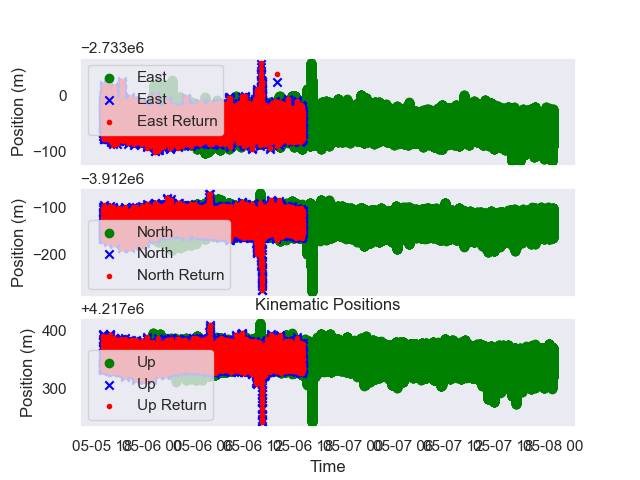

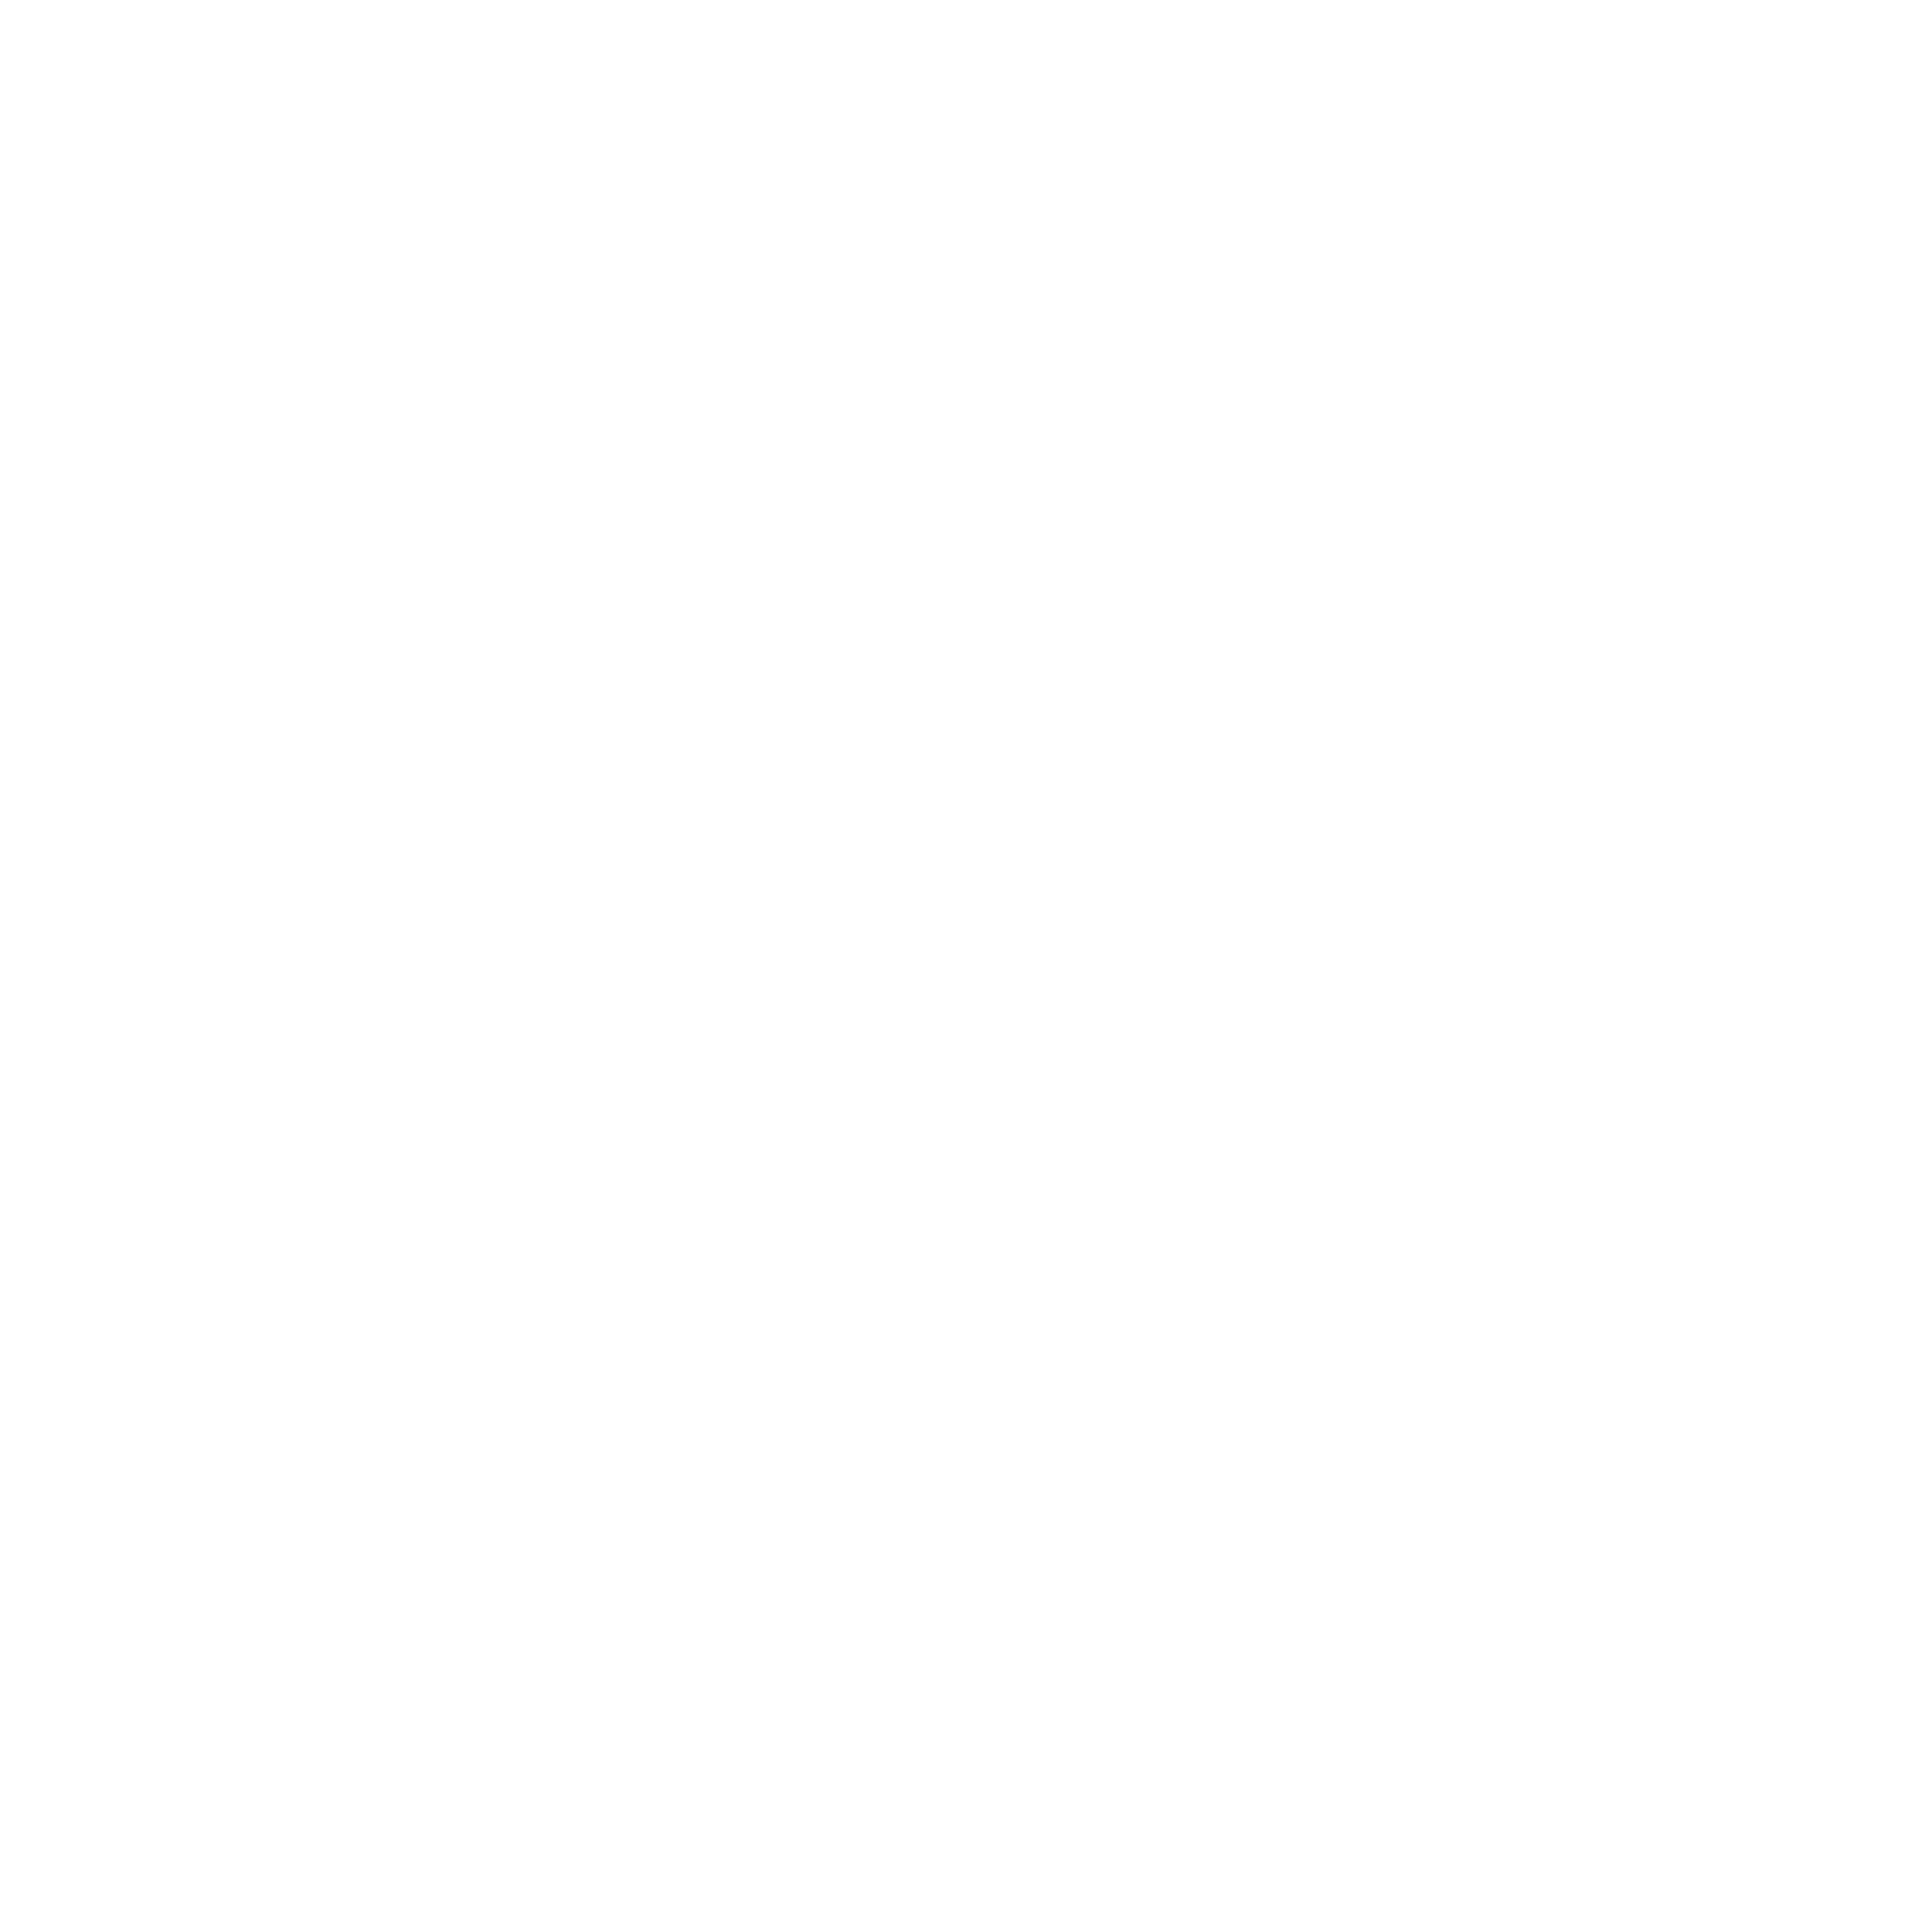

In [55]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import NavigationToolbar2Tk

plt.ion()  # Turn on interactive mode
plt.figure(figsize=(16*2, 16*2))
fig,axes = plt.subplots(3,1,sharex=True)

axes[0].scatter(kin_positions['time'], kin_positions["east"], label='East',color='green')
axes[0].scatter(shotdata['pingTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["east0"], label='East',color='blue',marker='x')
axes[0].scatter(shotdata['returnTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["east1"], label='East Return',color='red',marker='.')
axes[0].set_ylabel('Position (m)')
axes[0].legend()
axes[0].grid()

axes[1].scatter(kin_positions['time'], kin_positions["north"], label='North',color='green')
axes[1].scatter(shotdata['pingTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["north0"], label='North',color='blue',marker='x')
axes[1].scatter(shotdata['returnTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["north1"], label='North Return',color='red',marker='.')
axes[1].set_ylabel('Position (m)')
axes[1].legend()
axes[1].grid()

axes[2].scatter(kin_positions['time'], kin_positions["up"], label='Up',color='green')
axes[2].scatter(shotdata['pingTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["up0"], label='Up',color='blue',marker='x')
axes[2].scatter(shotdata['returnTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["up1"], label='Up Return',color='red',marker='.')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Position (m)')
axes[2].legend()
axes[2].grid()

plt.title('Kinematic Positions')
plt.show()